                    Data Science I: Fundamentos de Data Science - CoderHouse 
# “Desarrollo de un Modelo Predictivo para Optimizar las Campañas de Marketing Digital Basado en el Comportamiento del Cliente”

## Abstract
Este proyecto de data science se centra en la exploración y análisis de un dataset extenso, proporcionado con el fin de predecir la respuesta de los clientes a campañas de marketing digital. La importancia de este estudio radica en la creciente necesidad de las empresas de optimizar sus estrategias de marketing para maximizar el retorno de inversión (ROI). Utilizando datos históricos sobre comportamientos de compra y respuestas a campañas previas, este trabajo se propone identificar patrones clave que determinan la efectividad de las campañas de marketing.

El análisis se basa en varias variables críticas, como los ingresos de los clientes, el gasto en productos específicos, la frecuencia de las compras, y otros atributos demográficos y de comportamiento. A través del uso de técnicas avanzadas de análisis de datos y machine learning, se desarrollará un modelo predictivo que permitirá a las empresas anticipar la respuesta de sus clientes a futuras campañas.

Para lograr estos objetivos, se emplearán diversas técnicas de visualización de datos, incluyendo gráficos multivariados, para explorar la relación entre los distintos atributos del cliente y su propensión a responder positivamente a las campañas de marketing. Estas visualizaciones ayudarán a identificar patrones y tendencias que no son inmediatamente obvios, proporcionando una comprensión más profunda de los factores que influyen en la decisión de compra.

El proyecto seguirá un enfoque metodológico riguroso, comenzando con la limpieza y preparación de datos, seguido de un análisis exploratorio exhaustivo. Posteriormente, se implementarán y evaluarán varios modelos de machine learning para determinar el modelo más efectivo.

Los resultados esperados de este proyecto no solo proporcionarán insights valiosos sobre los factores que influyen en la decisión de compra de los clientes, sino que también ofrecerán directrices prácticas para la ejecución de futuras campañas de marketing digital. Al implementar estos hallazgos, las empresas podrán diseñar campañas más efectivas, dirigidas a segmentos específicos de clientes con una alta probabilidad de conversión, optimizando así sus recursos y mejorando significativamente el ROI.

En resumen, este estudio no solo contribuirá al campo del marketing digital mediante el desarrollo de herramientas predictivas avanzadas, sino que también demostrará el poder del análisis de datos y el machine learning en la toma de decisiones empresariales estratégicas.


## Data Set

### Nombre: 
Marketing Campaign

### URL Kaggle:
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Descripción General
* **Número de filas:** 2240
* **Número de columnas:** 29
* **Tipos de datos:** Incluyen valores numéricos (int64 y float64) y categóricos (object).


### Columnas Clave y Descripción Breve
* **ID:** Identificador único del cliente.
* **Year_Birth:** Año de nacimiento del cliente.
* **Education:** Nivel de educación del cliente.
* **Marital_Status:** Estado civil del cliente.
* **Income:** Ingresos anuales del hogar del cliente.
* **Kidhome:** Número de niños en el hogar.
* **Teenhome:** Número de adolescentes en el hogar.
* **Dt_Customer:** Fecha en la que él cliente accedió a la empresa.
* **Recency:** Días desde la última compra.
* **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:** Gastos en diferentes
categorías de productos en los últimos dos años.
* **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases:** Número de compras a través de
diferentes canales.
* **NumWebVisitsMonth:** Número de visitas al sitio web en el último mes.
* **AcceptedCmp1 - AcceptedCmp5, Response:** Indica si el cliente aceptó las diferentes campañas de marketing.
* **Complain:** Indica si el cliente ha presentado quejas.
* **Z_CostContact, Z_Revenue:** Columnas de control interno.

## Hipótesis
### 1. Hipótesis sobre Ingresos y Gastos en Marketing:

* **H1:** Los clientes con mayores ingresos gastan significativamente más en productos de alto valor como vinos y carnes en comparación con otros productos.
* **H2:** Los ingresos influyen en la respuesta a campañas de marketing, siendo más probable que los clientes con mayores ingresos respondan positivamente.

### 2. Hipótesis sobre Comportamiento de Compra y Campañas de Marketing:

* **H3:** Los clientes que han realizado un mayor número de compras a través del sitio web son más propensos a responder a campañas de marketing.
* **H4:** Los clientes que visitan con frecuencia el sitio web compran más productos a través de tiendas web.

### 3. Hipótesis sobre Demografía y Comportamiento de Compra:

* **H5:** Los clientes más jóvenes tienden a realizar más compras por tiendas web.
* **H6:** El estado civil y la presencia de hijos (Kidhome, Teenhome) influyen en los patrones de gasto en diferentes categorías de productos.

### 4. Hipótesis sobre Recencia de Compra y Medios de Compra de acuerdo a su nivel de Educación:

* **H7:** Los clientes que han realizado compras recientemente tienen una mayor probabilidad de responder a nuevas campañas de marketing.
* **H8:** El nivel de educación de los clientes influye en su preferencia de canal de compra, mostrando diferencias significativas en la utilización de la tienda web y la tienda física.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [77]:
#Leer el archivo
df = pd.read_csv("marketing_campaign.csv", delimiter=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [78]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Limpieza y preparación de datos

In [79]:
# Limpieza de valores nulos
df["Income"].fillna(df["Income"].median(), inplace=True)

# Identificación y estandarización de valores extremos usando cuartiles
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
primer_quartil = Q1 - 1.5 * IQR
tercer_quartil = Q3 + 1.5 * IQR

# Reemplazo de valores extremos
df["Income"] = df["Income"].clip(lower=primer_quartil, upper=tercer_quartil)


### Visualización para H1: Relación entre Ingresos y Gasto en Vinos y Carnes

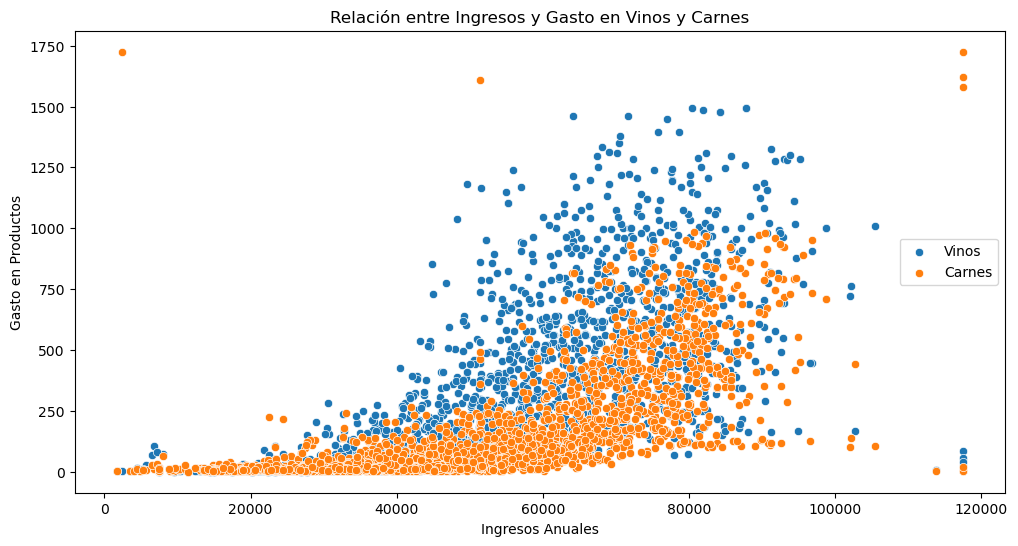

In [80]:
# Visualización de la relación entre ingresos y gasto en vinos y carnes
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Income", y="MntWines", data=df, label="Vinos")
sns.scatterplot(x="Income", y="MntMeatProducts", data=df, label="Carnes")
plt.title("Relación entre Ingresos y Gasto en Vinos y Carnes")
plt.xlabel("Ingresos Anuales")
plt.ylabel("Gasto en Productos")
plt.legend()
plt.show()


Se revisa que a mayor ingreso, mayor consumo de productos. Por lo que las personas con mayores ingresos pueden ser más propensos a comprar articulos más variados y/o nuevos.

### Visualización para H2: Relación entre Ingresos y Respuesta a Campañas de Marketing

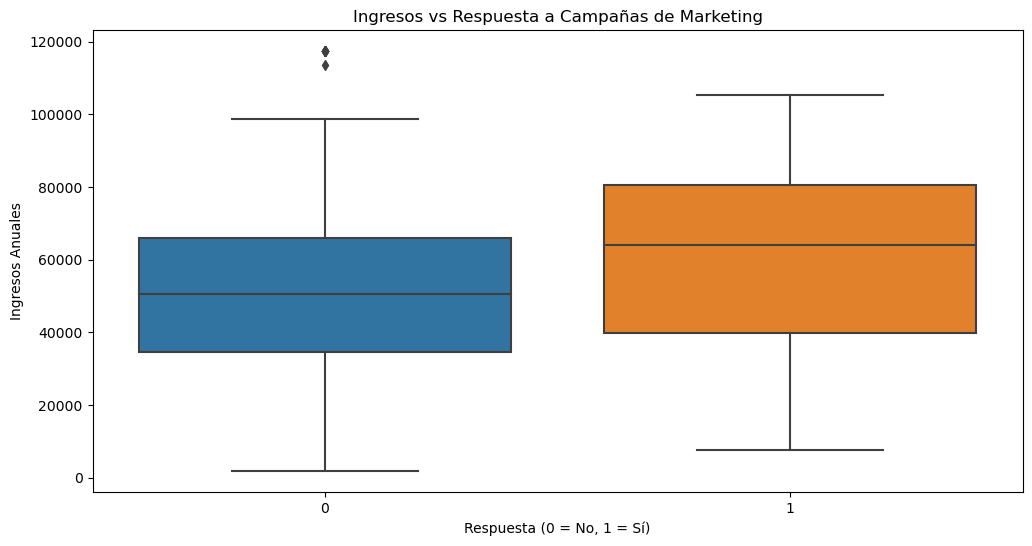

In [81]:
# Visualización de la relación entre ingresos y respuesta a campañas de marketing
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Ingresos vs Respuesta a Campañas de Marketing")
plt.xlabel("Respuesta (0 = No, 1 = Sí)")
plt.ylabel("Ingresos Anuales")
plt.show()


Clientes con mayores ingresos son más propensos a reponder positivamente a una campaña de marketing. Pero esto no es concluyente.

### Visualización para H3: Los clientes que han realizado un mayor número de compras a través del sitio web son más propensos a responder a campañas de marketing.

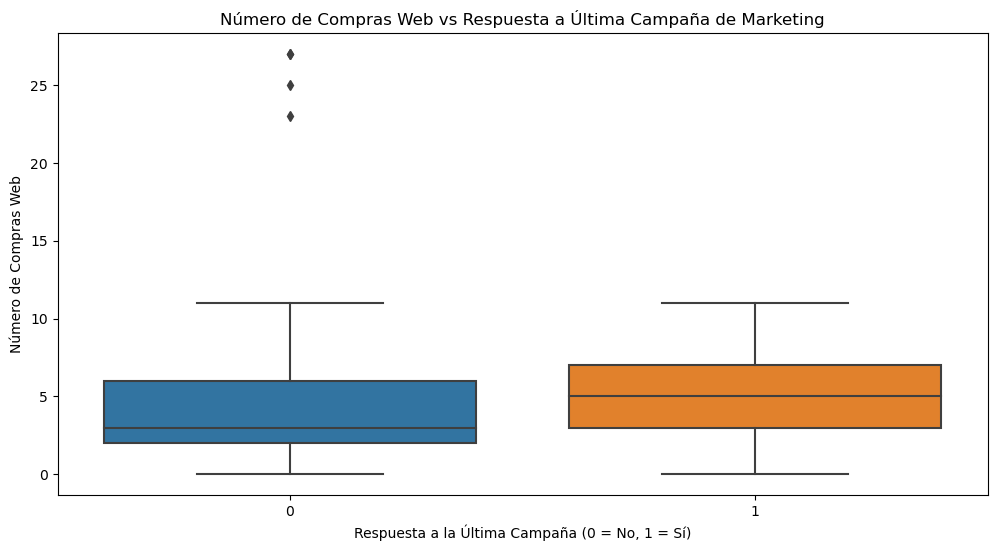

In [82]:
# Visualización de la relación entre número de compras web y respuesta a campañas
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="NumWebPurchases", data=df)
plt.title("Número de Compras Web vs Respuesta a Última Campaña de Marketing")
plt.xlabel("Respuesta a la Última Campaña (0 = No, 1 = Sí)")
plt.ylabel("Número de Compras Web")
plt.show()

No se encuetra mucha relación entre que los clientes que compran por tienda web vuelvan a comprar por una campaña de marketing. Pero si se puede establecer que los clientes vuelven a comprar en base a su experiencia y/o por los articulos que necesitan.

### Visualización para H4: Los clientes que visitan con frecuencia el sitio web compran más productos a través de tiendas web.

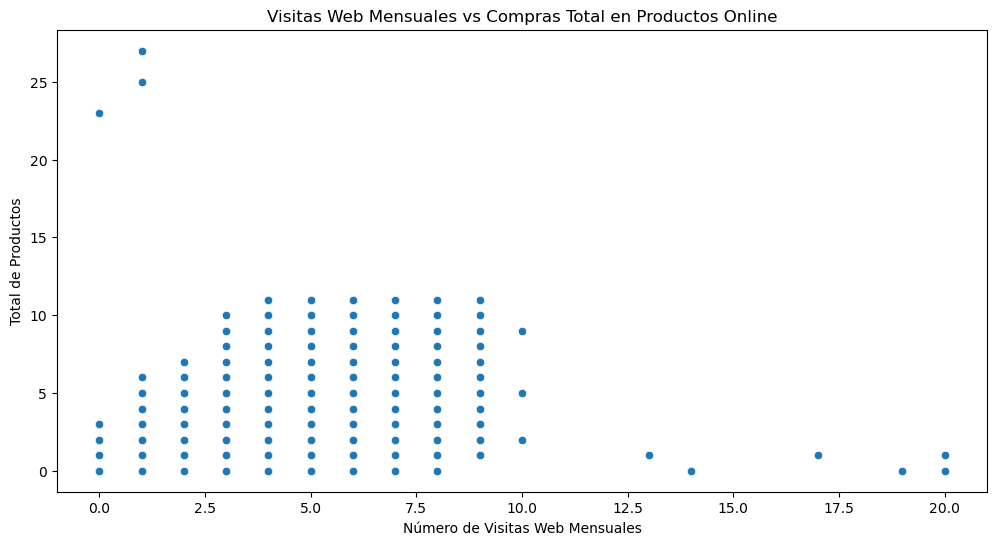

In [83]:
# Visualización de la relación entre visitas web y gasto total en productos online
plt.figure(figsize=(12, 6))
sns.scatterplot(x="NumWebVisitsMonth", y="NumWebPurchases", data=df)
plt.title("Visitas Web Mensuales vs Compras Total en Productos Online")
plt.xlabel("Número de Visitas Web Mensuales")
plt.ylabel("Total de Productos")
plt.show()

Se detecta que a mayor visitas al sitio, mayores son las compras que se realizan. Esto puede deverse a que los clientes buscan comprar por la calidad de los producos y la experiencia con el sitio web.

### Visualización para H5: Los clientes más jóvenes tienden a comprar más productos por tienda web.

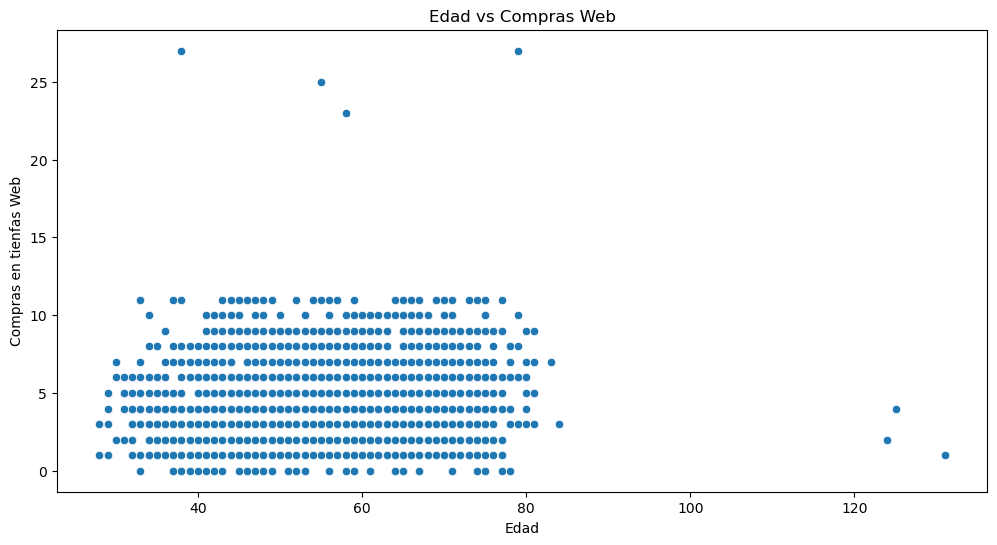

In [84]:
# Calculando la edad del cliente
df["Age"] = 2024 - df["Year_Birth"]  # Asumiendo que el año actual es 2024

# Visualización de la relación entre edad y compras Web
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="NumWebPurchases", data=df)
plt.title("Edad vs Compras Web")
plt.xlabel("Edad")
plt.ylabel("Compras en tienfas Web")
plt.show()


No hay mayor diferencia de edad en las compras por tiendas web. Si habría una diferencia en la cantidad de productos que compran de acuerdo al rango etario. A mayor edad, mayor cantidad de productos. 

### Visualización para H6: El estado civil y la presencia de hijos (Kidhome, Teenhome) influyen en los patrones de gasto en diferentes categorías de productos.

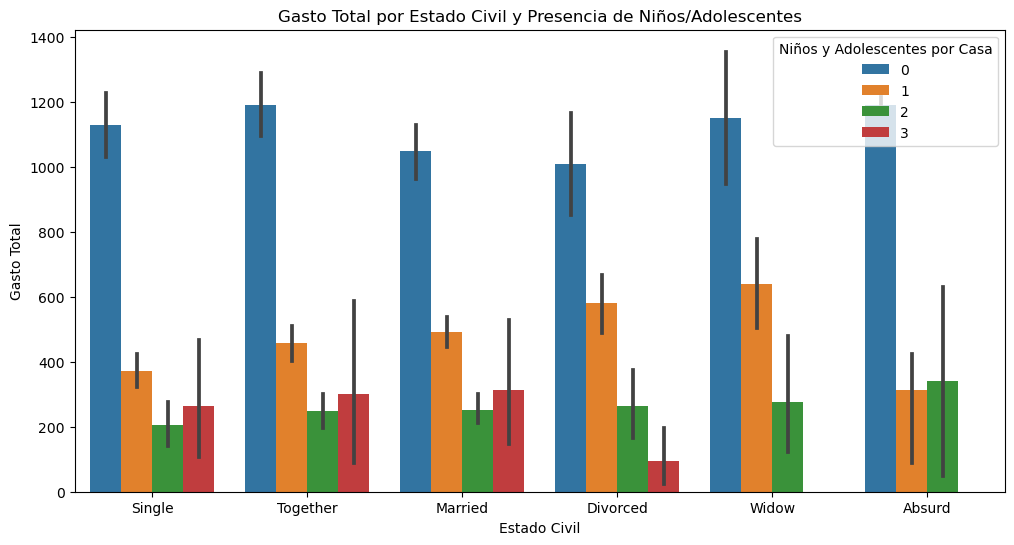

In [85]:
# Definir los estados civiles aceptados
accepted_statuses = ["Single", "Married", "Together", "Divorced", "Widow"]

# Reemplazar valores anómalos ("YOLO") en "Marital_Status"
df["Marital_Status"] = df["Marital_Status"].apply(lambda x: x if x in accepted_statuses else "Absurd")

# Visualización de gasto por estado civil y presencia de hijos y adolescentes
plt.figure(figsize=(12, 6))
df["TotalSpend"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["TotalKidsTeen"] = df["Kidhome"] + df["Teenhome"]
sns.barplot(x="Marital_Status", y="TotalSpend", hue="TotalKidsTeen", data=df)
plt.title("Gasto Total por Estado Civil y Presencia de Niños/Adolescentes")
plt.xlabel("Estado Civil")
plt.ylabel("Gasto Total")
plt.legend(title="Niños y Adolescentes por Casa",loc="upper right")
plt.show()


El consumo por estado civil sin hijos se revisa similar. Pero en donde hay más varinza es cuando se encuentra presencia de hijos/adolescentes en el domicilio. Eso hace que el consumo sea mayor o menor.

### Visualización para H7: Los clientes que han realizado compras recientemente tienen una mayor probabilidad de responder a nuevas campañas de marketing.

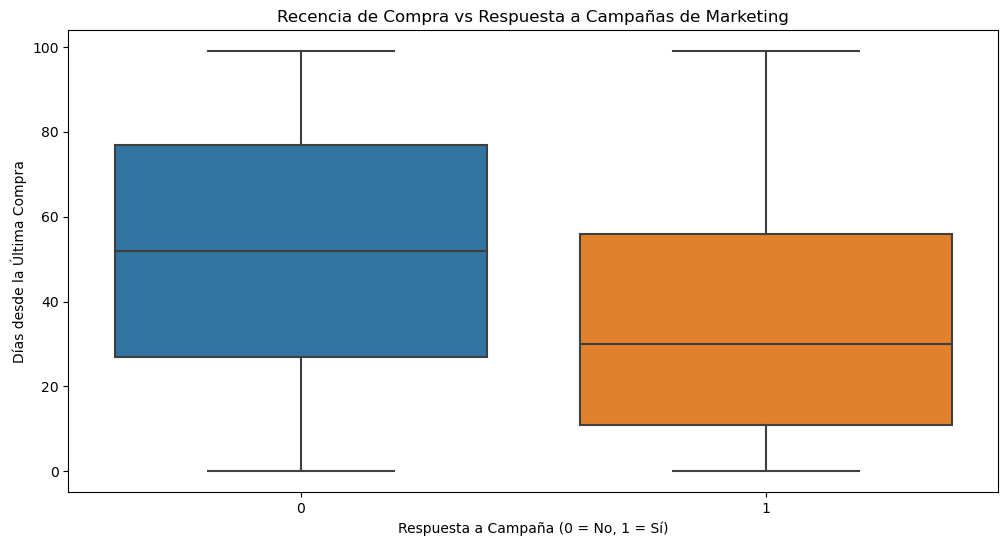

In [86]:
# Visualización de la recencia vs respuesta a campañas
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Recency", data=df)
plt.title("Recencia de Compra vs Respuesta a Campañas de Marketing")
plt.xlabel("Respuesta a Campaña (0 = No, 1 = Sí)")
plt.ylabel("Días desde la Última Compra")
plt.show()


Esto demuestra que los clientes vuelven a comprar más por la experiencia o calidad de los productos que por nuevas campañas de marketing.

### Visualización para H8: El nivel de educación de los clientes influye en su preferencia de canal de compra, mostrando diferencias significativas en la utilización de la tienda web y la tienda física.

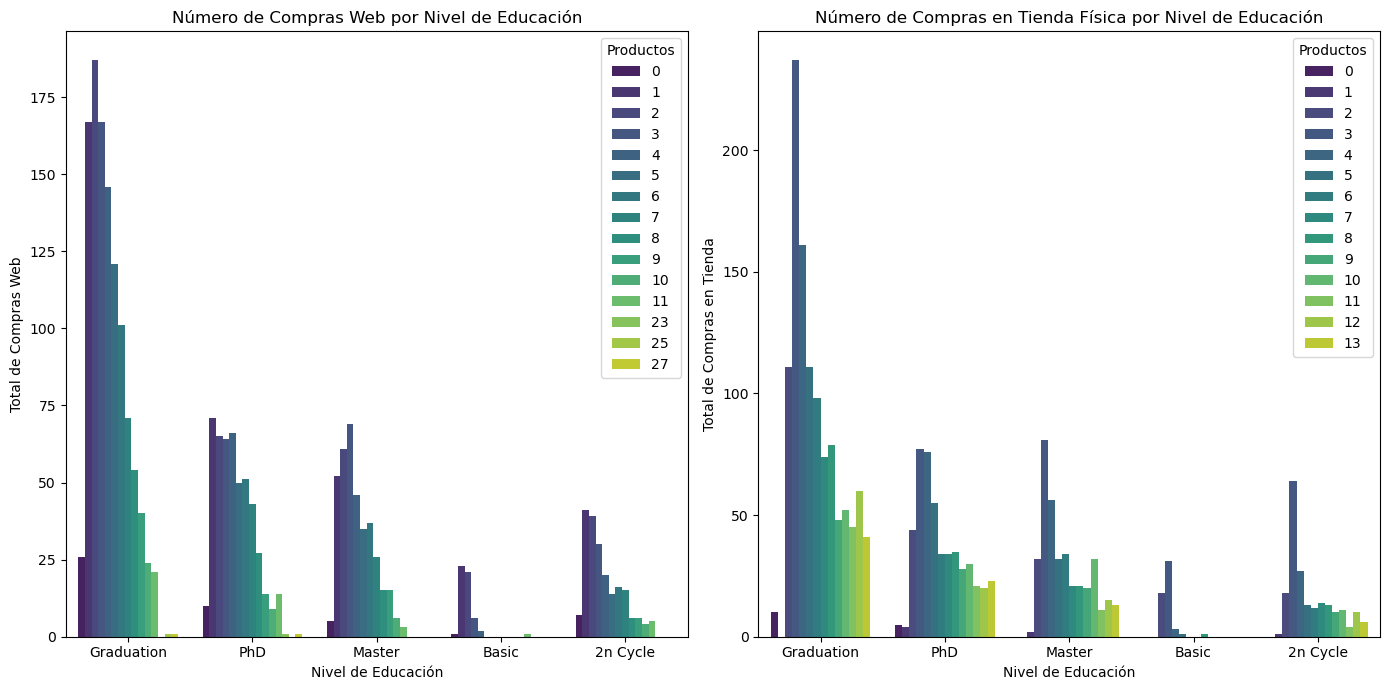

In [90]:
# Crear una figura para visualizar los datos
plt.figure(figsize=(14, 7))

# Subplot para compras en tienda web
plt.subplot(1, 2, 1)
sns.countplot(x="Education", data=df, hue="NumWebPurchases", palette="viridis")

plt.title("Número de Compras Web por Nivel de Educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Total de Compras Web")
plt.legend(title="Productos", loc="upper right")

# Subplot para compras en tienda física
plt.subplot(1, 2, 2)
sns.countplot(x="Education", data=df, hue="NumStorePurchases", palette="viridis")
plt.title("Número de Compras en Tienda Física por Nivel de Educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Total de Compras en Tienda")
plt.legend(title="Productos", loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
Se revisa que en proporción los dos canales son bien recibidos para realizar compras, pero en tiendas la compra es de mayor cantidad de productos